In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\patil\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\patil\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('retail_sales_dataset.csv')

In [3]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1000, 9)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [7]:
df = df.dropna(subset=['Date'])

In [8]:
print(df.info())
print("\nUnique values per column:\n", df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None

Unique values per column:
 Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         

In [9]:
print("===== DESCRIPTIVE STATISTICS =====")

print("\nMean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode(numeric_only=True).iloc[0])
print("\nStandard Deviation:\n", df.std(numeric_only=True))

===== DESCRIPTIVE STATISTICS =====

Mean:
 Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median:
 Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Mode:
 Transaction ID     1.0
Age               43.0
Quantity           4.0
Price per Unit    50.0
Total Amount      50.0
Name: 0, dtype: float64

Standard Deviation:
 Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Transaction ID,1000.0,NaN,NaN,NaN,500.5,1.0,250.75,500.5,750.25,1000.0,288.819436
Date,1000,NaN,NaN,NaN,2023-07-03 00:25:55.200000256,2023-01-01 00:00:00,2023-04-08 00:00:00,2023-06-29 12:00:00,2023-10-04 00:00:00,2024-01-01 00:00:00,NaN
Customer ID,1000,1000,CUST001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1000.0,NaN,NaN,NaN,41.392,18.0,29.0,42.0,53.0,64.0,13.68143
Product Category,1000,3,Clothing,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1000.0,NaN,NaN,NaN,2.514,1.0,1.0,3.0,4.0,4.0,1.132734
Price per Unit,1000.0,NaN,NaN,NaN,179.89,25.0,30.0,50.0,300.0,500.0,189.681356
Total Amount,1000.0,NaN,NaN,NaN,456.0,25.0,60.0,135.0,900.0,2000.0,559.997632


In [11]:
if 'Total Amount' in df.columns:
    df['Sales'] = df['Total Amount']
else:
    df['Sales'] = df['Quantity'] * df['Price per Unit']

df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

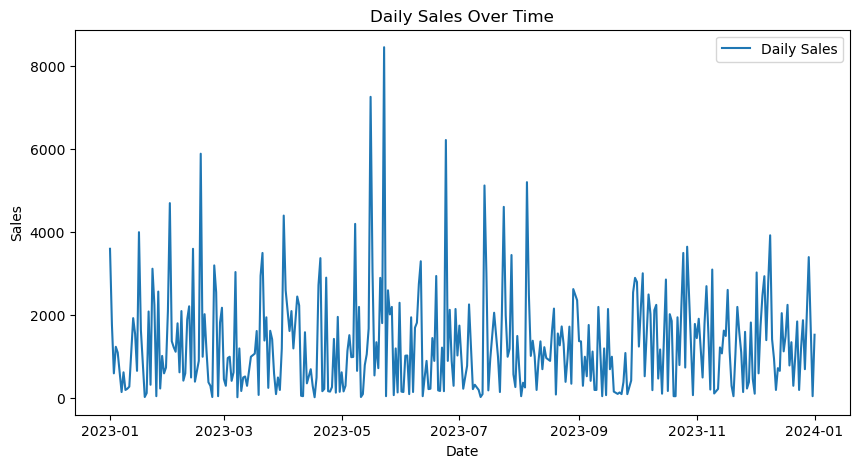

In [12]:
daily_sales = df.groupby('Date')['Sales'].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


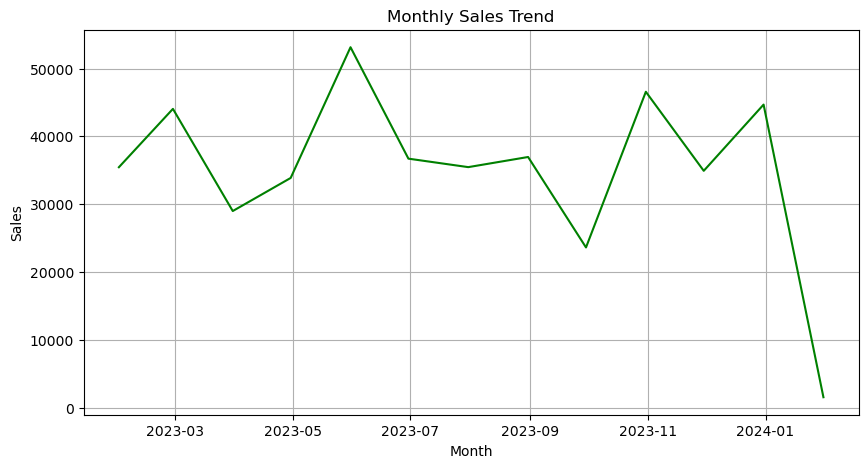

In [20]:
monthly_sales = df.resample('ME', on='Date')['Sales'].sum()
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

===== CUSTOMER ANALYSIS  =====


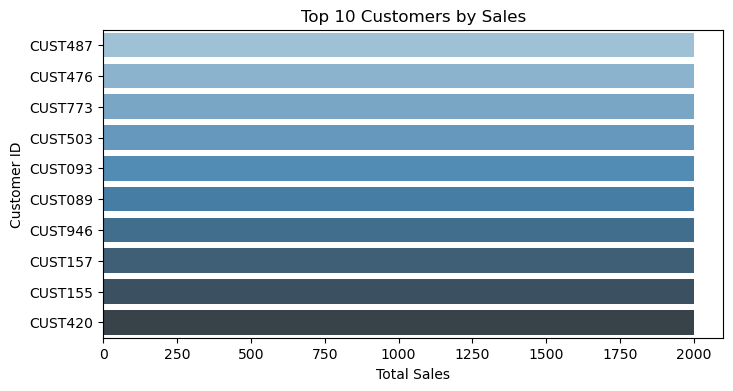

In [14]:
print("===== CUSTOMER ANALYSIS  =====")
if 'Customer ID' in df.columns:
    customer_sales = df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,4))
    sns.barplot(x=customer_sales.values, y=customer_sales.index, palette="Blues_d")
    plt.title('Top 10 Customers by Sales')
    plt.xlabel('Total Sales')
    plt.ylabel('Customer ID')
    plt.show()


In [15]:
print('====  PRODUCT ANALYSIS  ====')
if 'Product' in df.columns:
    product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,4))
    sns.barplot(x=product_sales.values, y=product_sales.index, palette="viridis")
    plt.title('Top 10 Products by Sales')
    plt.xlabel('Total Sales')
    plt.ylabel('Product')
    plt.show()


====  PRODUCT ANALYSIS  ====


In [16]:
df['Weekday'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

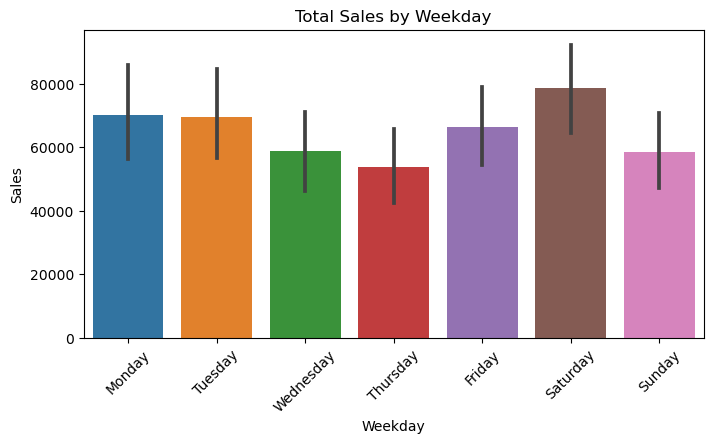

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(x='Weekday', y='Sales', data=df, estimator=sum, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Total Sales by Weekday')
plt.xticks(rotation=45)
plt.show()


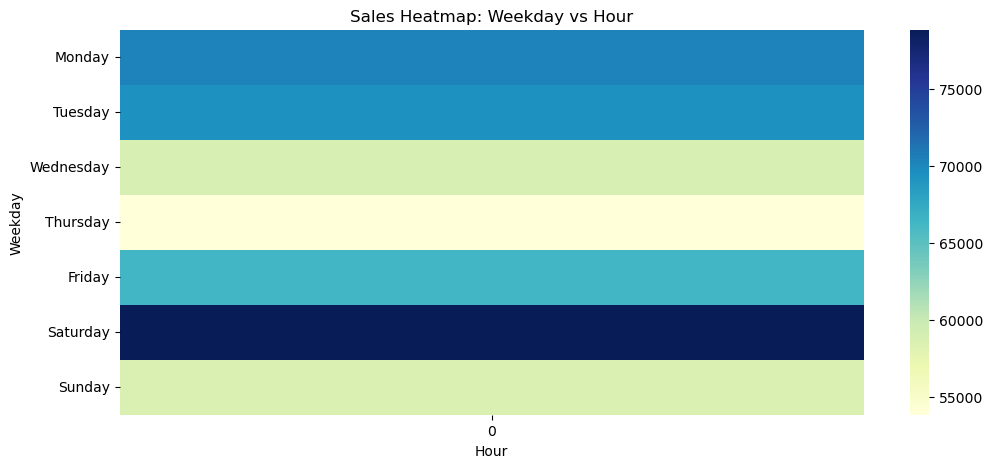

In [18]:
pivot = df.pivot_table(index='Weekday', columns='Hour', values='Sales', aggfunc='sum', fill_value=0)
pivot = pivot.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(12,5))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Sales Heatmap: Weekday vs Hour')
plt.show()

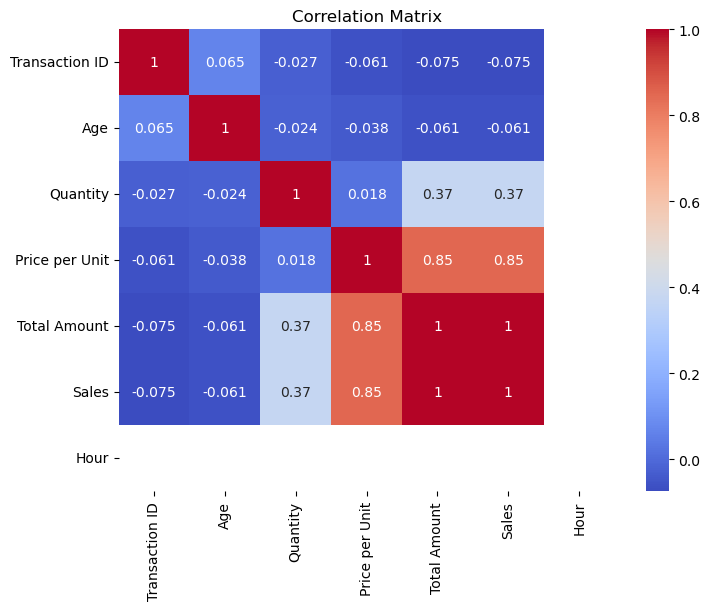

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Recommendations Based on EDA

1. Sales Trends:
    Peak sales occur during specific months (identified in time series plot).
    Plan inventory and promotions in those high-demand months.

2. Customer Insights:
    The top 10 customers contribute a large share of revenue.
    Consider loyalty programs or personalized offers for them.

3. Product Insights:
    Focus marketing on top-performing products.
    Review underperforming products for potential discounting or removal.

4. Temporal Patterns:
    Sales are stronger on weekends and specific hours.
    Schedule social media ads or flash sales during those peak times.

5. Next Steps:
    Build forecasting models (e.g., ARIMA or Prophet) for future sales prediction.
    Conduct RFM segmentation (Recency, Frequency, Monetary) to understand customer groups better.